In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.optimize import curve_fit
from scipy.stats import linregress
from read_dat import read_dat
from scipy.signal import savgol_filter

def gaussian(x, mu, sigma, A):
    return (A*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*((x-mu)/sigma)**2))


In [2]:
filename = 'BKG'
file = read_dat(f'./EJ276_50x50_Data/{filename}.dat')

init complete


In [14]:
file.lst_out(events=False, ch=True, output=[[1,1,0,0,0]])

1000 events
2000 events
3000 events
4000 events
5000 events
6000 events
7000 events
8000 events
9000 events
10000 events
11000 events
12000 events
End reading


In [10]:
filename = 'Co60'

In [11]:
file = open(f'./EJ276_50x50_Data/{filename}_params_0.csv', 'r')

reader = csv.reader(file)

head = next(reader, None)
print(head)
head = next(reader, None)
print(head)

L = []

for row in reader:
    L.append(float(row[0]))

L = np.array(L)


['./EJ276_50x50_Data/Co60 channel 0, False events, cuts False']
['L [ch]', 'S[ch]']


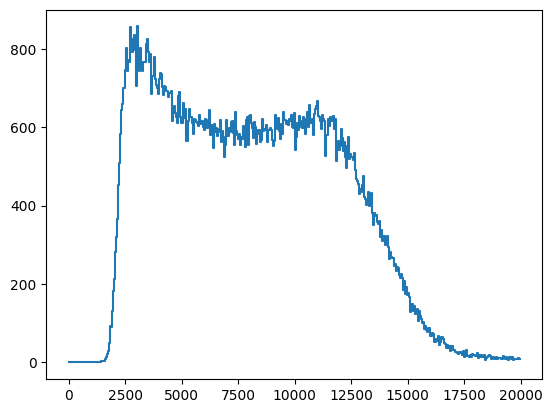

In [12]:
hist = np.histogram(L, bins='sqrt', range=(0, 20000,))
plt.step(hist[1][:-1], hist[0])
plt.show()

[ 13919.86239651   1598.42757685 -27703.57917107]


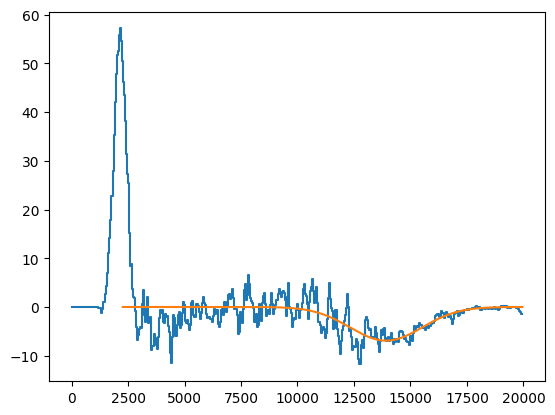

In [13]:
grad = savgol_filter(np.gradient(hist[0]), 20, 3)
# grad = np.gradient(hist[0])

popt, pcov = curve_fit(gaussian, hist[1][50:-1], grad[50:], [6000,500,-1])

print(popt)

plt.figure()
plt.step(hist[1][:-1], grad)
plt.plot(hist[1][50:-1], gaussian(hist[1][50:-1], *popt))

plt.show()

Cs - 6212.38093788
661.657 -> 477.333

Na - 4413.7517781
511 -> 340.67

Na - 14290.44976287
1274.537 -> 1061.702

<!-- Ba - 1913.18662731
356.0129 -> 207.2649407 -->

Co - 13919.86239651
1332.492 -> 1118.10

Mn - 8379.87321255
834.848 -> 639.2190228

In [14]:
import uncertainties as un

LinregressResult(slope=7.280833261560682e-05, intercept=0.02366570282243352, rvalue=0.9999042814767728, pvalue=9.57185232272062e-05, stderr=7.123776071837186e-07, intercept_stderr=0.006495091955026671)
7.28e-05
7.28e-05
slope m = (7.281+/-0.071)e-05
intercept c = 0.0237+/-0.0065


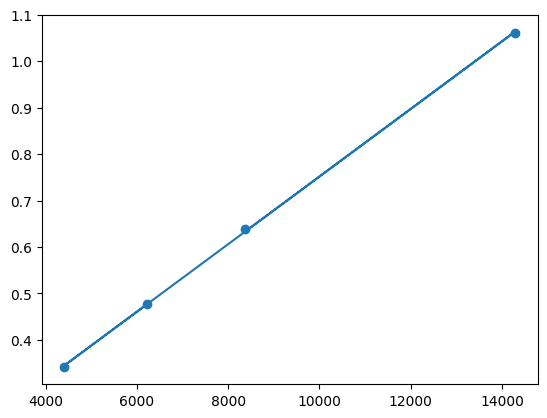

In [40]:
# Long integral values
x = np.array([6212.38093788, 4413.7517781, 14290.44976287, 8379.87321255])
# Energies in MeV
y = np.array([0.47733374509, 0.340666666, 1.0617027983, 0.6392190228])

plt.scatter(x, y)

lin_regress = linregress(x, y)
print(lin_regress)

print(round(lin_regress.slope, 7))
print(np.round(lin_regress.slope, 7))
m = un.ufloat(lin_regress.slope, lin_regress.stderr)
c = un.ufloat(lin_regress.intercept, lin_regress.intercept_stderr)
print(f'slope m = {m:.2u}')
print(f'intercept c = {c:.2u}')

plt.plot(x, lin_regress[0] * x + lin_regress[1])



slope=0.00010230476254145869, intercept=0.012454430536400718